In [2]:
import sys
import os
# Add the scripts directory to the sys.path
scripts_path = os.path.abspath('../scripts')
sys.path.append(scripts_path)
import data_preprocessing as dp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
df = dp.load_and_preprocess_data('../data/lung_cancer.csv')

In [4]:
#Inspect the data 
print(df.head())
print(df.info())

   GENDER  AGE  SMOKING  YELLOW FINGERS  ANXIETY  PEER PRESSURE  \
0       1   69        0               1        1              0   
1       1   74        1               0        0              0   
2       0   59        0               0        0              1   
3       1   63        1               1        1              0   
4       0   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG CANCER  
0                    1                      1    

In [5]:
# - Select relevant features (assuming the last column is the target variable and we exclude it)
# For clustering, we don't need the target, so we drop it (if it's present)
X = df.drop(columns=['LUNG CANCER'])  


In [6]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Ajuster `eps` et `min_samples` selon vos données
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

In [8]:
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
-1    248
 0     11
 2      7
 3      5
 1      5
Name: count, dtype: int64


In [9]:
if len(set(df['dbscan_cluster'])) > 1:  # More than one cluster (excluding noise)
    silhouette = silhouette_score(X_scaled, df['dbscan_cluster'])
    print(f"Silhouette Score: {silhouette}")
else:
    print("Clustering contains only one cluster (no noise), so silhouette score is not applicable.")


Silhouette Score: -0.1261388467750123


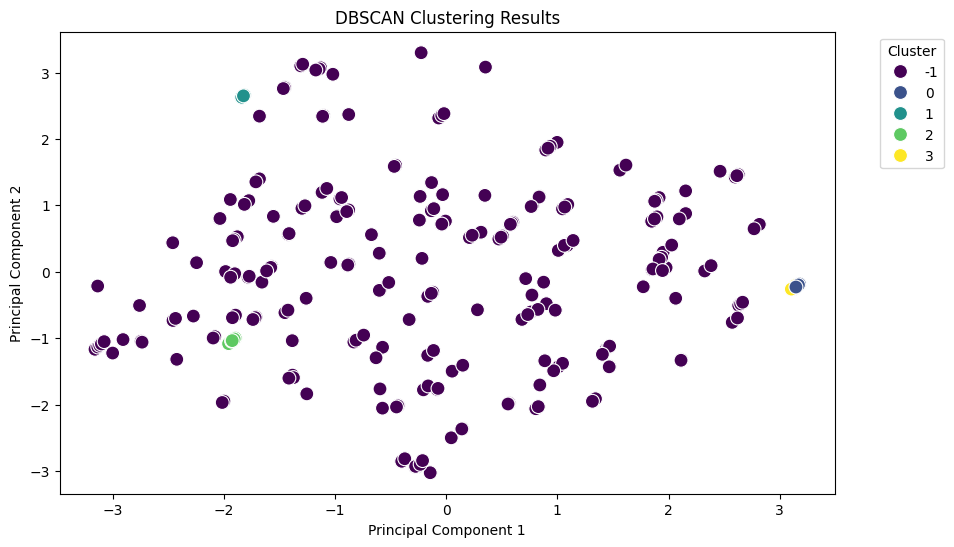

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['dbscan_cluster'], palette="viridis", s=100, marker='o')
plt.title("DBSCAN Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

In [11]:
if len(set(df['dbscan_cluster'])) > 1 and -1 not in df['dbscan_cluster'].values:
    silhouette = silhouette_score(X_scaled, df['dbscan_cluster'])
    print(f"Silhouette Score: {silhouette}")
else:
    print("Silhouette score is not applicable because clustering contains only one cluster or noise points.")


Silhouette score is not applicable because clustering contains only one cluster or noise points.


In [12]:
#Further Analysis of clusters
cluster_stats = df.groupby('dbscan_cluster').mean().T  # Transpose to have features as rows and clusters as columns
print("\nCluster-wise Feature Statistics (Mean):\n", cluster_stats)


Cluster-wise Feature Statistics (Mean):
 dbscan_cluster                -1          0     1     2     3
GENDER                  0.487903   1.000000   1.0   0.0   1.0
AGE                    62.725806  63.090909  61.6  68.0  65.8
SMOKING                 0.512097   1.000000   1.0   1.0   0.0
YELLOW FINGERS          0.592742   0.000000   1.0   1.0   0.0
ANXIETY                 0.504032   0.000000   1.0   1.0   0.0
PEER PRESSURE           0.516129   0.000000   1.0   1.0   0.0
CHRONIC DISEASE         0.540323   0.000000   1.0   0.0   1.0
FATIGUE                 0.645161   1.000000   0.0   1.0   1.0
ALLERGY                 0.544355   1.000000   0.0   0.0   1.0
WHEEZING                0.516129   1.000000   0.0   1.0   1.0
ALCOHOL CONSUMING       0.528226   1.000000   1.0   0.0   1.0
COUGHING                0.548387   1.000000   0.0   1.0   1.0
SHORTNESS OF BREATH     0.608871   1.000000   0.0   1.0   1.0
SWALLOWING DIFFICULTY   0.471774   0.000000   1.0   1.0   0.0
CHEST PAIN              0.53

Cluster distribution:
 dbscan_cluster
-1    248
 0     11
 2      7
 3      5
 1      5
Name: count, dtype: int64


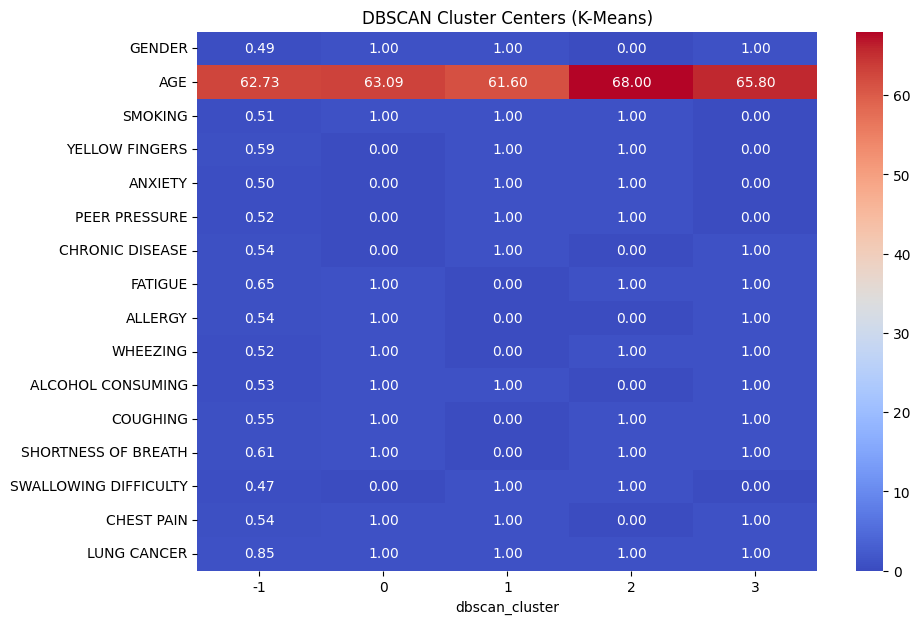

In [16]:
print("Cluster distribution:\n", df['dbscan_cluster'].value_counts())

plt.figure(figsize=(10, 7))
sns.heatmap(cluster_stats, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("DBSCAN Cluster Centers (K-Means)")
plt.show()


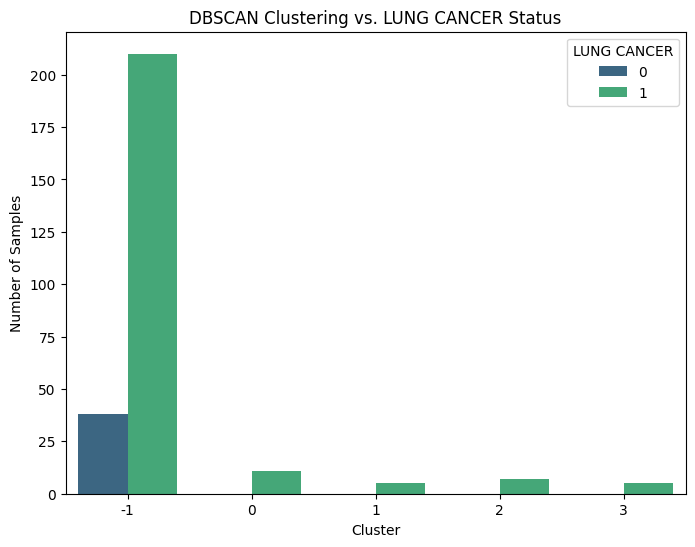

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='dbscan_cluster', hue='LUNG CANCER', data=df, palette='viridis')
plt.title("DBSCAN Clustering vs. LUNG CANCER Status")
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.legend(title='LUNG CANCER', loc='upper right')
plt.show()

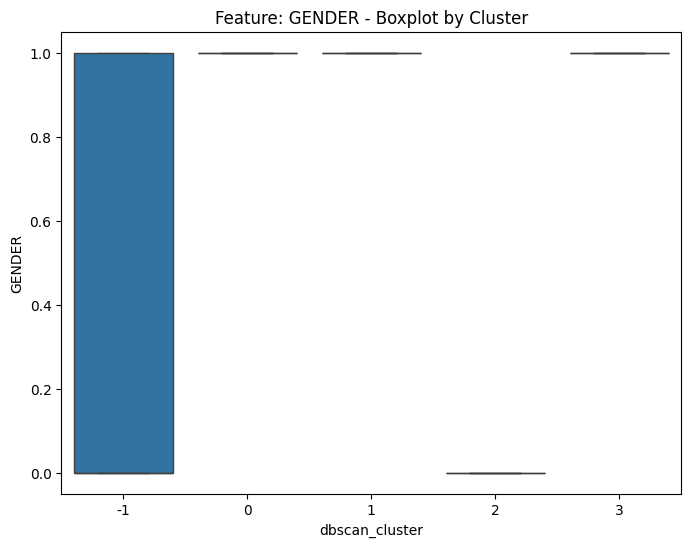

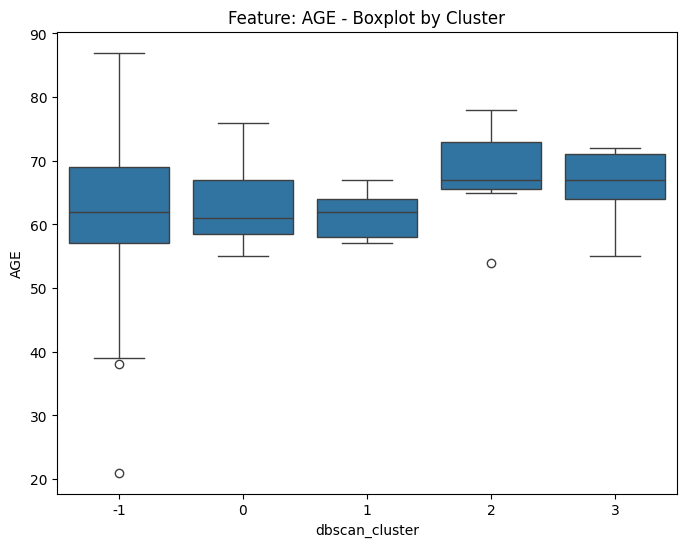

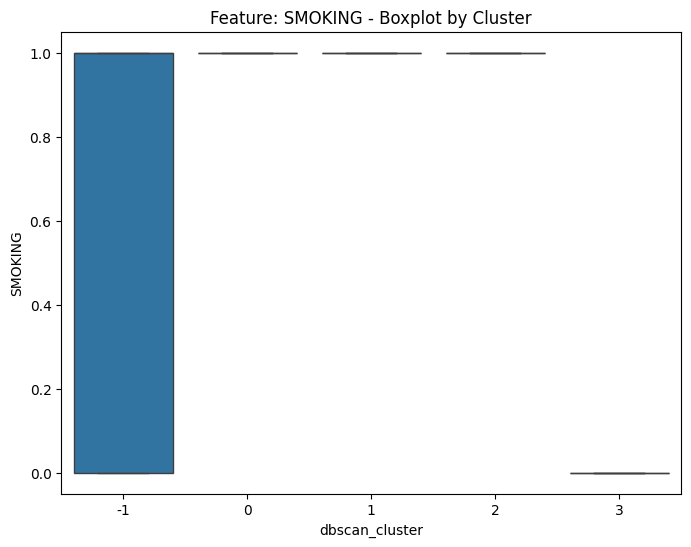

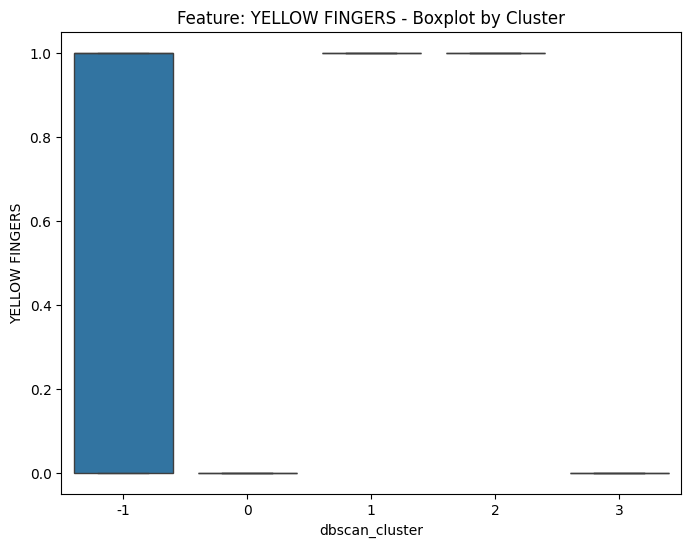

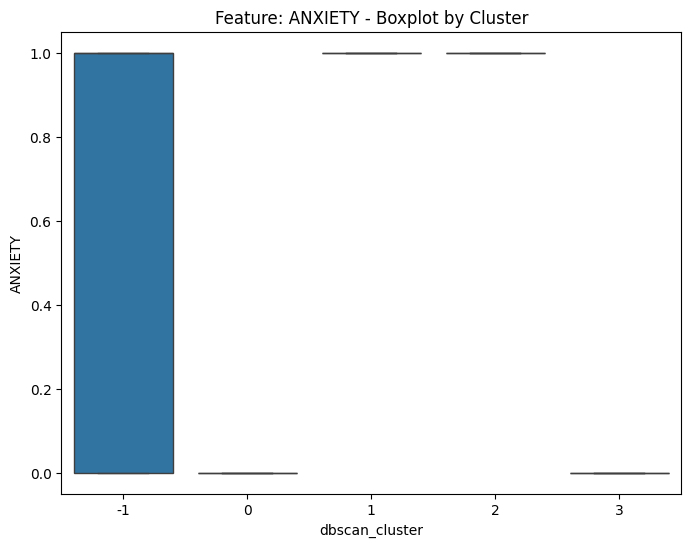

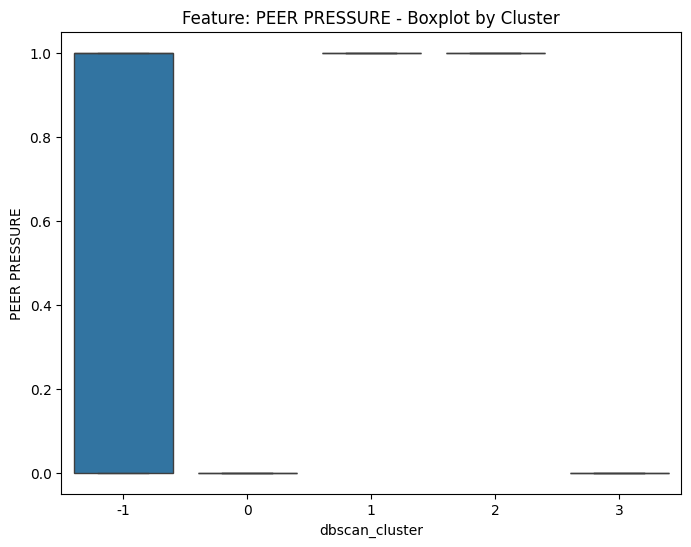

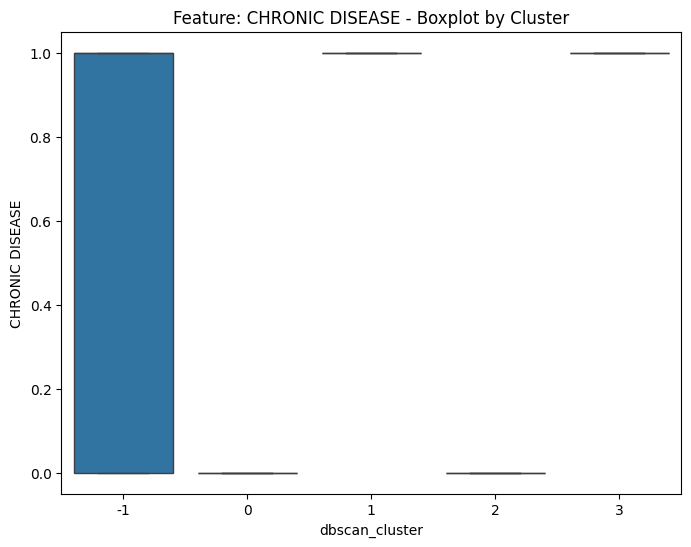

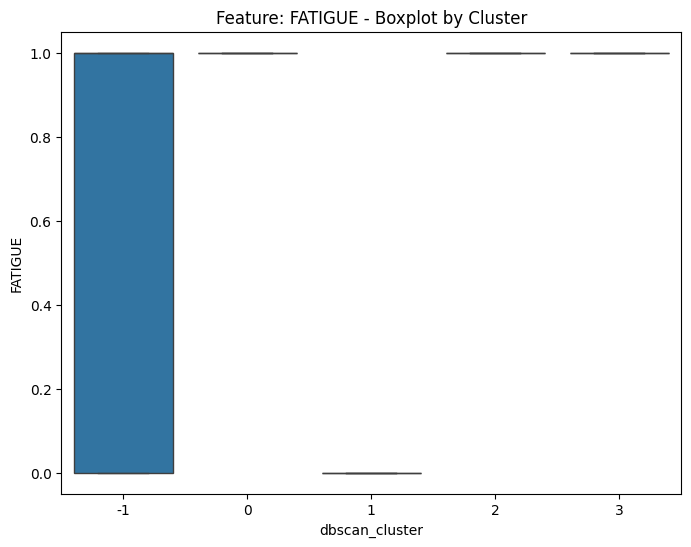

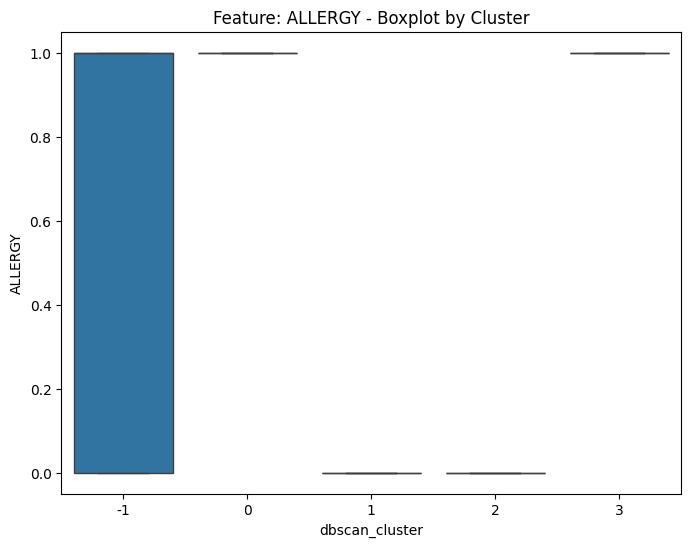

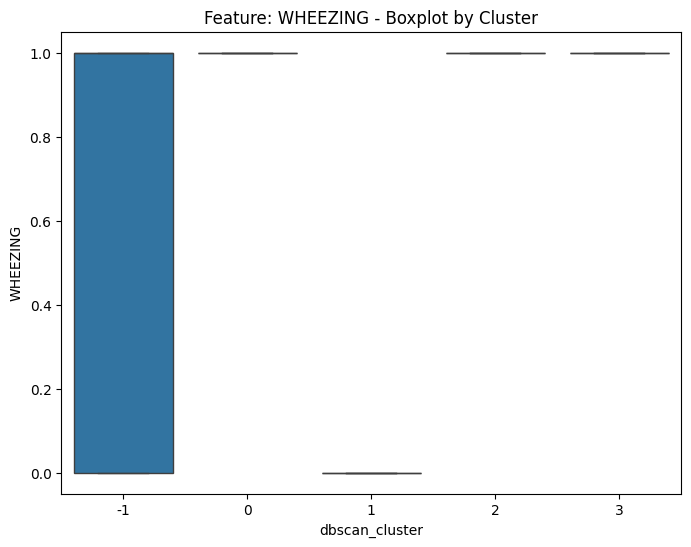

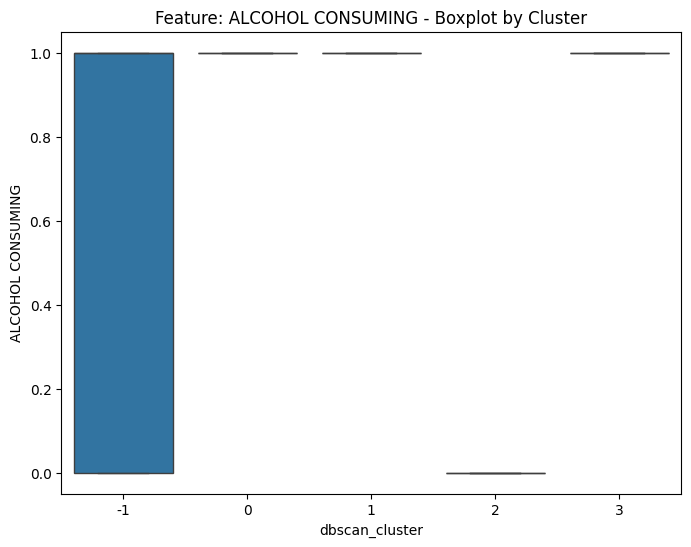

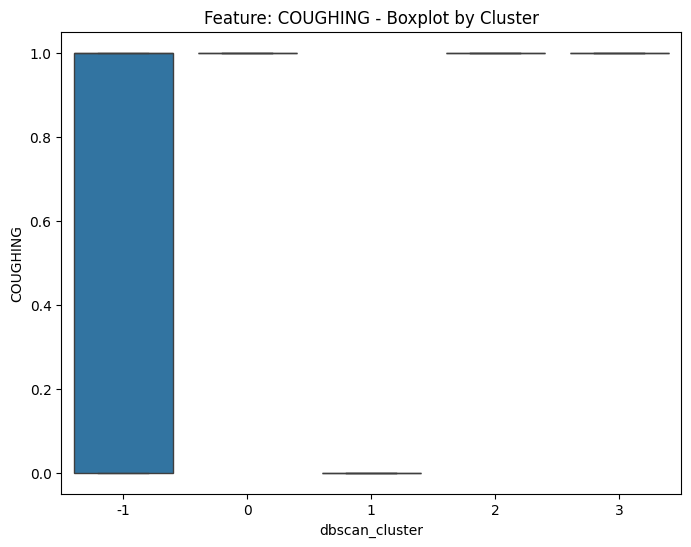

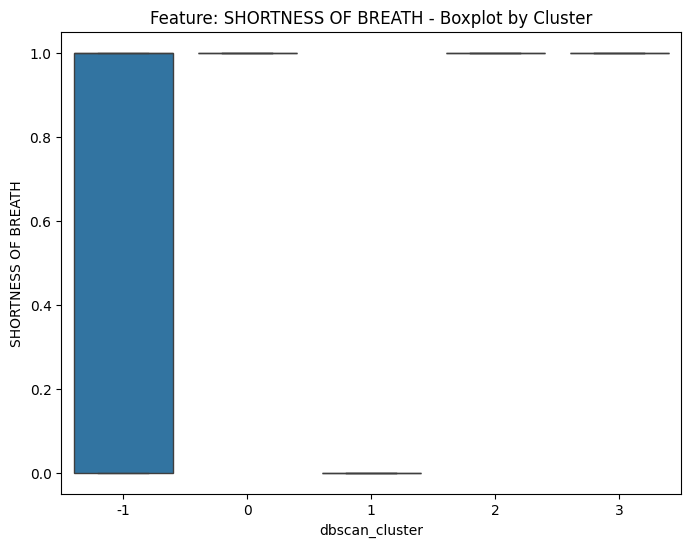

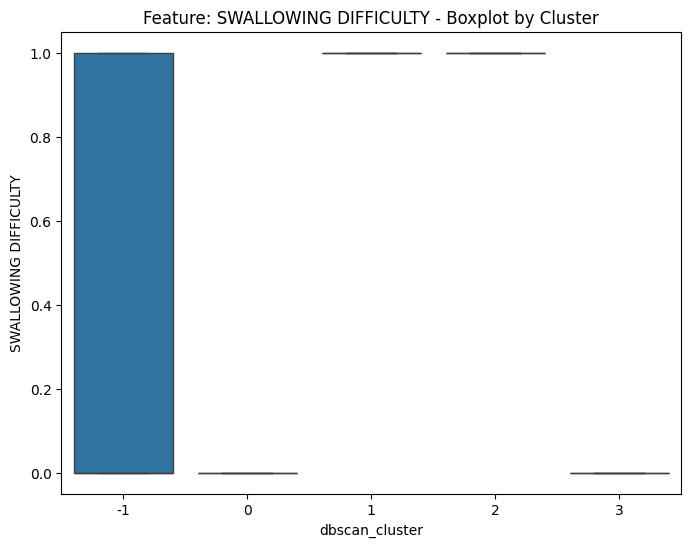

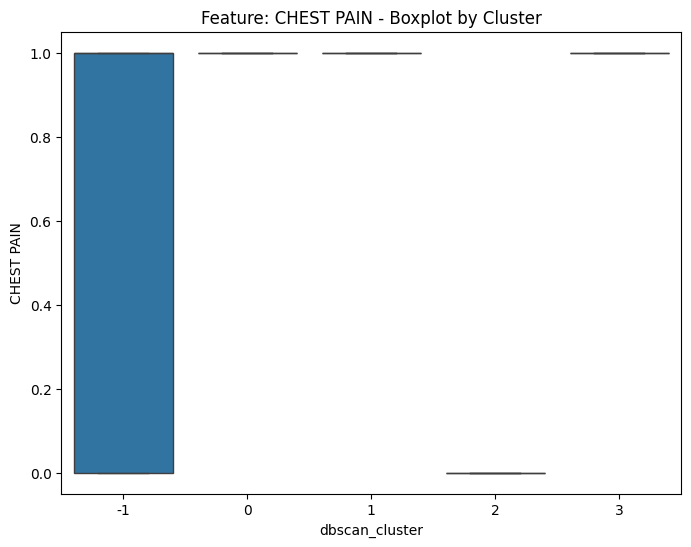

In [15]:
# Visualize feature distributions for each cluster
for column in X.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='dbscan_cluster', y=column, data=df)  # Boxplot for each feature grouped by cluster
    plt.title(f"Feature: {column} - Boxplot by Cluster")
    plt.show()